<a href="https://colab.research.google.com/github/adxpillar/DS-Unit-1-Build/blob/master/Adewale_Adeagbo_BW_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv('/content/abnb19.csv')

In [0]:
# check head and tail
df.head()
df.tail()

In [0]:
df.shape

(48895, 16)

In [0]:
df.describe()

In [0]:
df.describe(exclude='number')

In [0]:
# drop values that are not relevant to this analysis
df.drop(['id','name','host_name','host_id'],axis=1,inplace=True)

In [0]:
df.drop('neighbourhood',axis=1,inplace=True)

In [0]:
# Change name of neighbourhood group to Borough 
df['Borough'] = df['neighbourhood_group']

In [0]:
# drop redundant column 
df.drop('neighbourhood_group',axis=1,inplace=True)

In [0]:
# drop some more 
df.drop('last_review',axis=1,inplace=True)

In [0]:
#find missing values 
df.isnull().sum()

In [0]:
# drop reviews per month because it contains a lot of missing values 
df.drop('reviews_per_month',axis=1,inplace=True)

In [0]:
#Average price in each borough by property type 
borough_price = df.pivot_table(index='room_type',columns='Borough',values='price',aggfunc='mean')

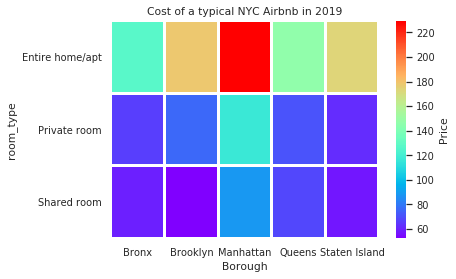

In [0]:
sns.set(font_scale=0.9)
sns.heatmap(data=borough_price,cmap='rainbow',cbar_kws={'label': 'Price'},robust=True,linewidths=2)
plt.title("Cost of a typical NYC Airbnb in 2019")
plt.show()

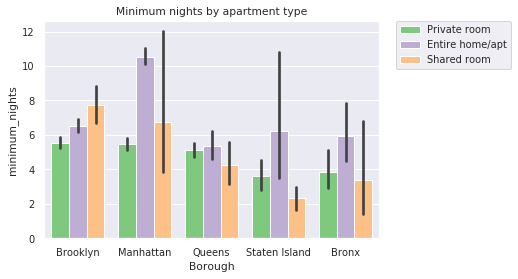

In [0]:
# Minimum nights on listed Airbnb by room type 
sns.barplot(x='Borough',y='minimum_nights',hue='room_type',data=df,palette='Accent',saturation=3)
plt.title("Minimum nights by apartment type")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

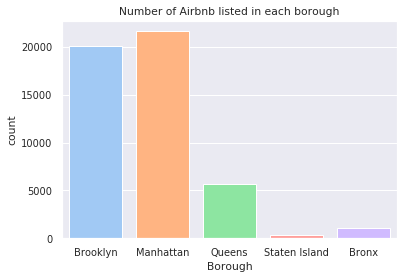

In [0]:
# Count of total Airbnb in each borough 
sns.countplot(x='Borough',data=df, palette='pastel', saturation=2)
plt.title("Number of Airbnb listed in each borough")
plt.show()

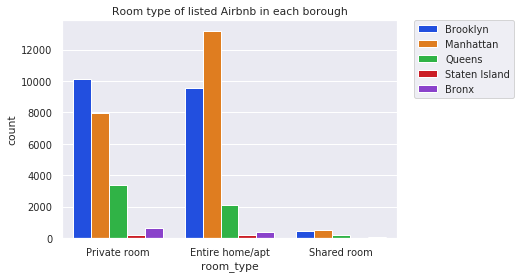

In [0]:
# count of Airbnb room type in each borough  
sns.countplot(x='room_type',hue='Borough',data=df,palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Room type of listed Airbnb in each borough")
plt.show()

In [0]:
# Number of days Airbnbs are available for booking in each Borough 
# cutpoints based on number of days each duration 
cut_points =  [2, 7, 14, 30, 90, 183, 274, 366]
label_names = ['Two days','One Week','Two Weeks','One Month', 'One Quarter','Half Year','One Year']
df['availability_categories'] = pd.cut(df['availability_365'],cut_points,labels=label_names,include_lowest=True)
df.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,availability_categories,Borough
0,40.64749,-73.97237,Private room,149,1,9,6,365,One Year,Brooklyn
1,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,One Year,Manhattan
2,40.80902,-73.94190,Private room,150,3,0,1,365,One Year,Manhattan
3,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,Half Year,Brooklyn
4,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,NaN,Manhattan


In [0]:
# create crosstab 
tab = pd.crosstab(df['Borough'],df['availability_categories'],aggfunc=None)
tab

availability_categories,Two days,One Week,Two Weeks,One Month,One Quarter,Half Year,One Year
Borough,,,,,,,
Bronx,20,15,31,222,180,93,345
Brooklyn,679,571,917,2717,2085,1768,3359
Manhattan,764,593,848,2476,2176,2249,4263
Queens,147,89,177,956,875,493,1515
Staten Island,3,3,9,68,47,45,156


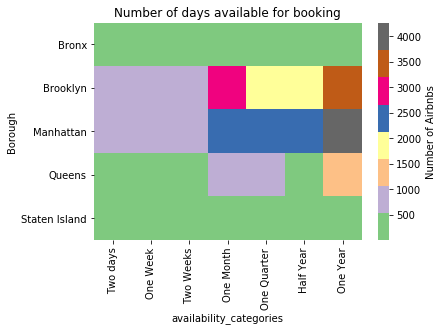

In [0]:
sns.heatmap(data=tab,cmap='Accent',cbar_kws={'label': 'Number of Airbnbs'})
plt.title("Number of days available for booking")
plt.show()